In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
sb.set()

In [12]:
#original = pd.read_csv('Phising_dataset_predict.csv')
original = pd.read_csv('qwertyy.csv')
data = original.copy()

data = data.dropna()
data = data.drop(columns = ['Unnamed: 0'])
X = data.drop(columns = ['Phising'])
Tar = data['Phising']
AL = pd.DataFrame(original[["AtSymbol", "NumPercent"]])

var = pd.DataFrame(X)
tar = pd.DataFrame(Tar)

X_train, X_test, y_train, y_test = train_test_split(var,tar,test_size = 0.2, random_state = 42)

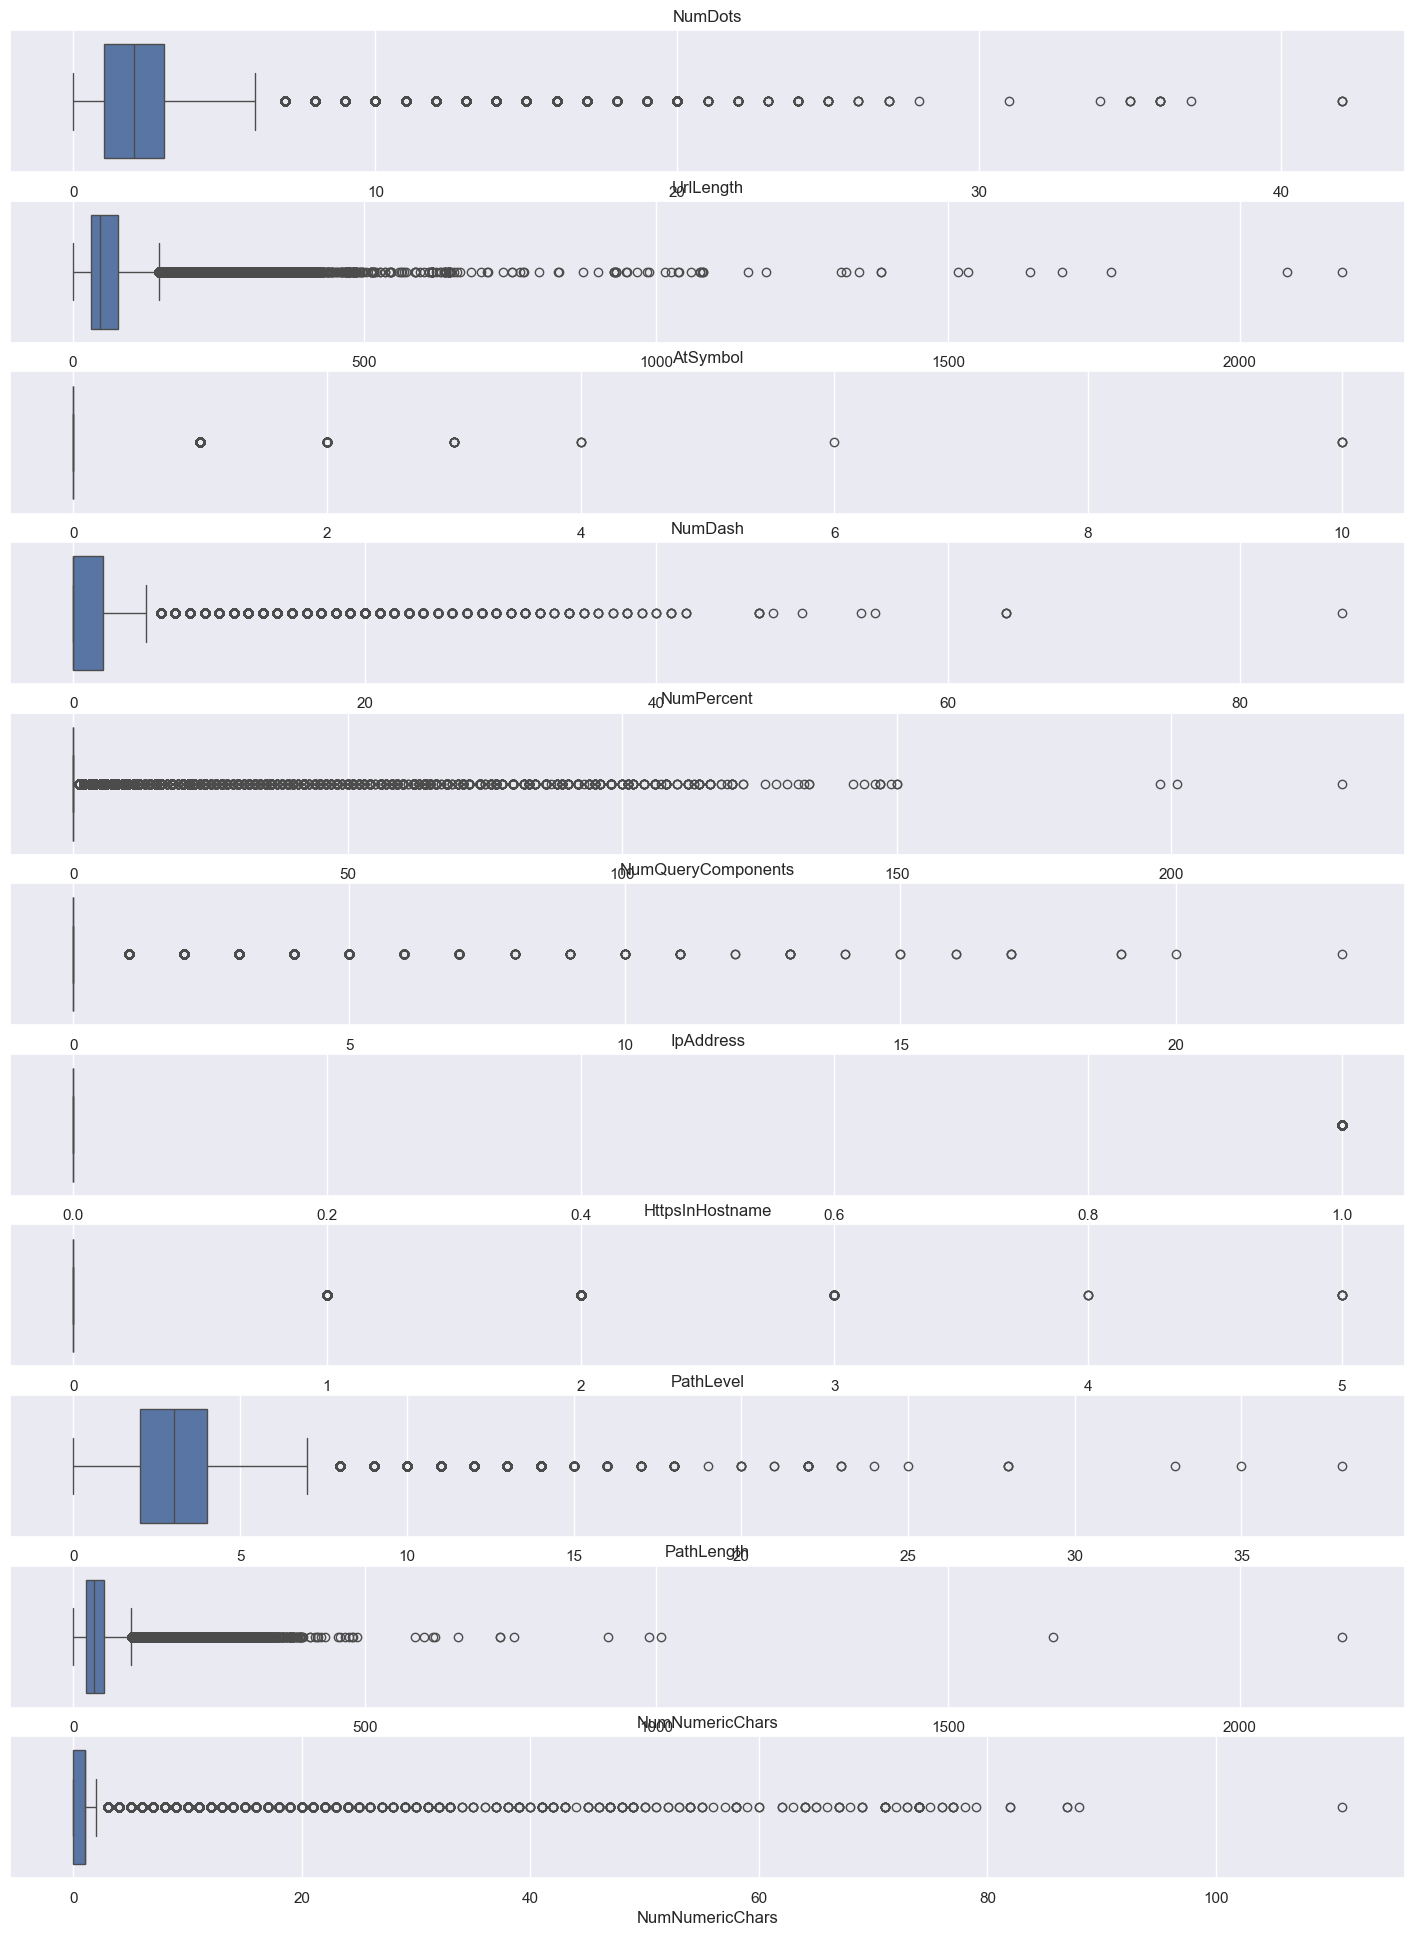

In [13]:
f, axes = plt.subplots(11, figsize=(18, 24))

count = 0
for i in X:
    sb.boxplot(data = X[i], orient = "h", ax = axes[count])
    axes[count].set_title(i)
    count += 1
    

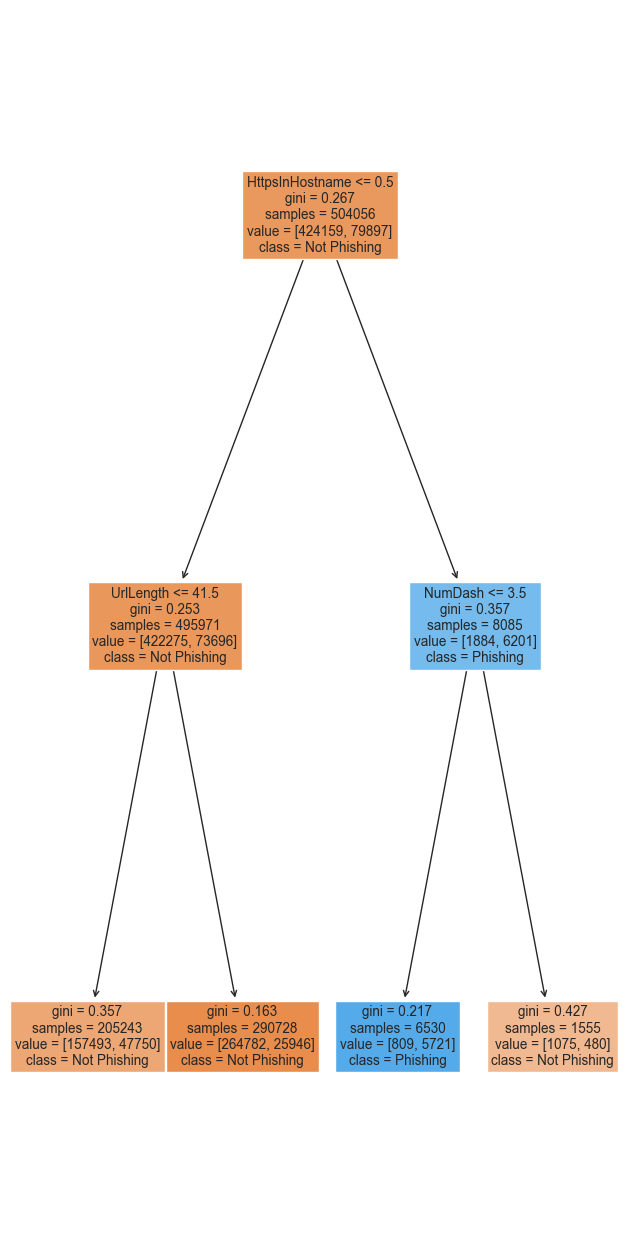

In [14]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

plt.figure(figsize=(8, 16))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Phishing', 'Phishing'])
plt.show()

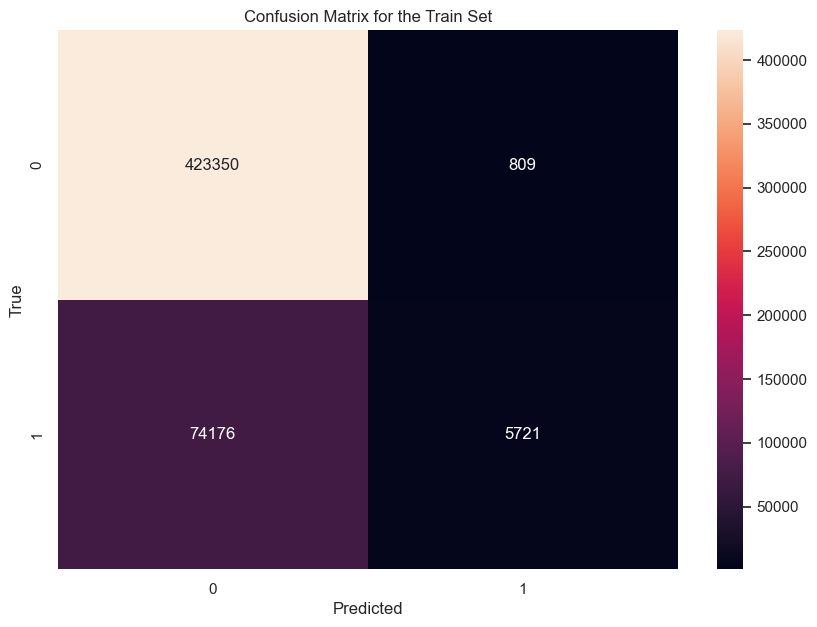

In [15]:
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Train Set')
plt.show()

In [16]:
true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

Classification Accuracy:  0.8500892750862993
True Positive Rate:  0.07160469103971363
True Negative Rate:  0.9980926963709363
False Positive Rate:  0.0019073036290636295
False Negative Rate:  0.9283953089602863


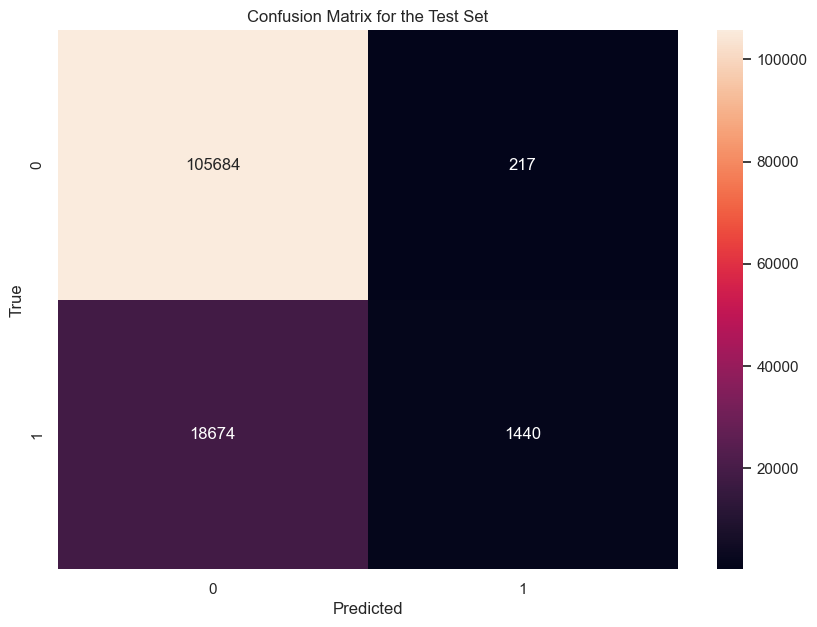

In [17]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_test, y_test)

y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 7))
sb.heatmap(cm_test, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

In [18]:
true_positive = cm_test[1, 1]
true_negative = cm_test[0, 0]
false_positive = cm_test[0, 1]
false_negative = cm_test[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)
true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)
false_negative_rate = false_negative / (false_negative + true_positive)

print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

Classification Accuracy:  0.8500892750862993
True Positive Rate:  0.07159192602167644
True Negative Rate:  0.9979509164219412
False Positive Rate:  0.002049083578058753
False Negative Rate:  0.9284080739783236


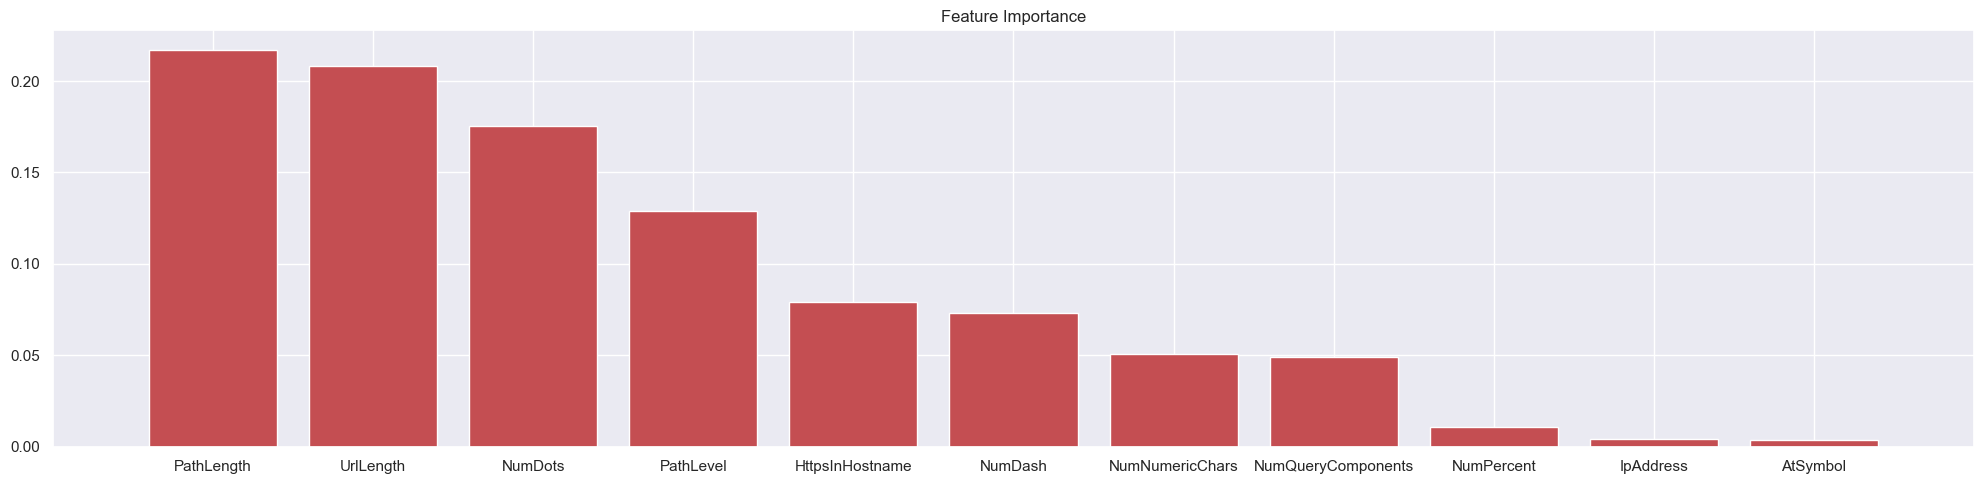

In [19]:
rfc = RandomForestClassifier(n_estimators=25, random_state=42)
rfc.fit(X_train, y_train.values.ravel())

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [21]:
df = pd.read_csv('qwertyy.csv')
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'IpAddress', 'AtSymbol', 'NumPercent'])
X = df.drop(columns = ['Phising'])
Tar = df['Phising']

var = pd.DataFrame(X)
tar = pd.DataFrame(Tar)

X_train, X_test, y_train, y_test = train_test_split(var,tar,test_size = 0.2, random_state = 42)

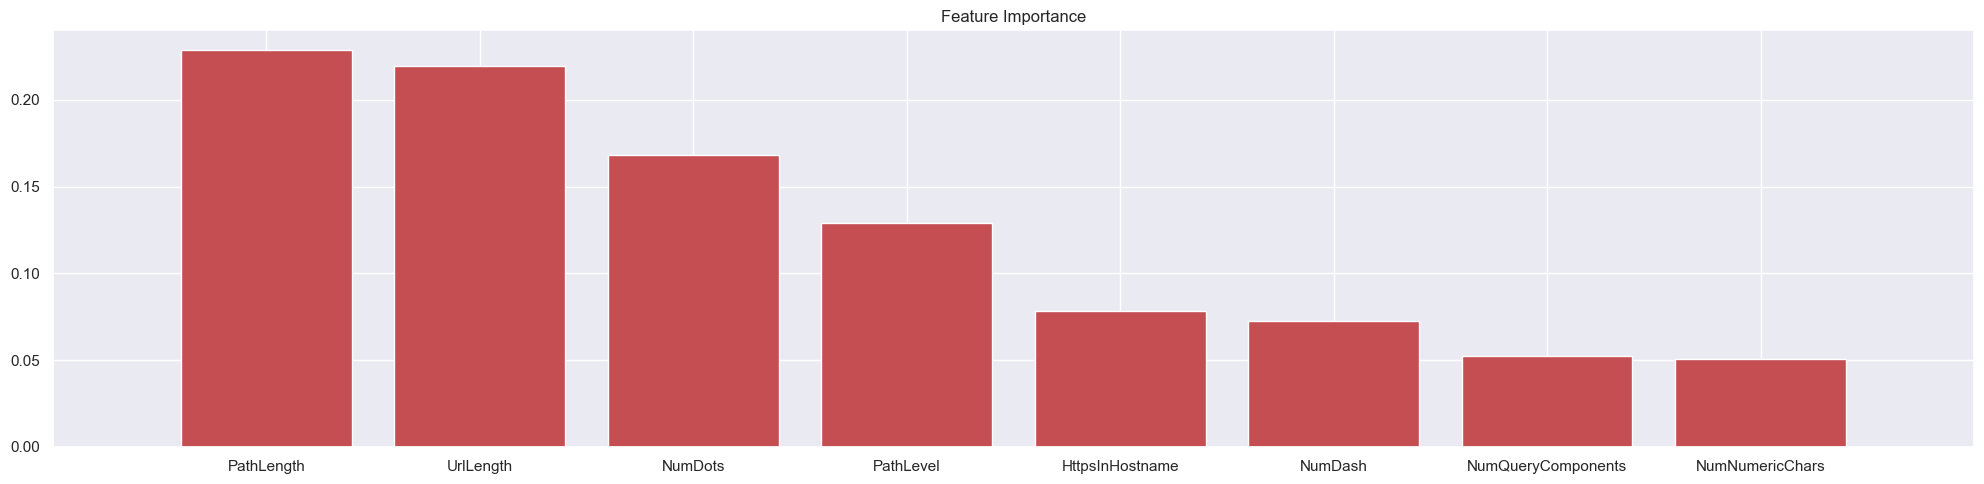

In [22]:
rfc = RandomForestClassifier(n_estimators=25, random_state=42)
rfc.fit(X_train, y_train.values.ravel())

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [ ]:
param_grid = {
    'n_estimators': [10,25, 50],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
}
#'min_samples_split': [2, 5, 10],
#'min_samples_leaf': [1, 2, 4]

model = RandomForestClassifier(random_state=24)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model using cross-validation
scores = cross_val_score(grid_search.best_estimator_, X, Tar, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Fitting 5 folds for each of 27 candidates, totalling 135 fits


# might need gridsearch to find optimal n_estimators

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train.values.ravel())

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
numerical_features = var.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred)}')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')    

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

In [ ]:
true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", rfc.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
y_train_pred = pipeline.predict(X_train)

In [ ]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Training Set')
plt.show()

In [ ]:
true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", rfc.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)